In [13]:

import nltk
from nltk import FreqDist
import re
import pandas as pd

df = pd.read_csv('movie_review_fullsentence.csv')
texts = df['Phrase'].str.lower().to_list()
# clean_texts=[]
# for text in texts:
#     text=text.replace("-"," ")
#     #text=text.replace("n't","not")
#     text=text.strip()
#     clean_texts.append(text)
labels = df['Sentiment'].astype(str).to_list()
test_train = df['label'].to_list()
word_tokens = [nltk.word_tokenize(t) for t in texts]

nltkstopwords = nltk.corpus.stopwords.words('english')
morestopwords = ['sha','wo','y',"'s","'d","'ll","'t","'m","'re",
                 "'ve",".",",",'``', '--','-lrb-', '-rrb-',"?",
                 "`",":","...","'","-",
                 'a', 'and', 'of', 'it', 'to', 'is', 'that', 'in', 'on',
                 'at', 'ar', 'has',"film","movie","the"]

stopwords =    morestopwords
lancaster = nltk.LancasterStemmer()
stopped_word_tokens= []
for words in word_tokens:
    stopped_word_tokens.append([lancaster.stem(w) for w in words if not w in stopwords])


word_tokens = stopped_word_tokens



all_words_list = [word for text in word_tokens for word in text]
all_words = nltk.FreqDist(all_words_list)
# get the 2000 most frequently appearing keywords in the corpus
word_items = all_words.most_common(1000)
word_features = [word for (word,count) in word_items]
print(word_features[:50])

def unigram_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['F_{}'.format(word)] = (word in document_words)
    return features



['as', 'but', 'with', 'for', 'thi', 'an', 'it', 'you', 'on', "n't", 'be', 'not', 'lik', 'mor', 'by', 'about', 'ar', 'al', 'hav', 'from', 'than', 'mak', 'act', 'his', 'ev', 'i', 'so', 'if', 'story', 'or', 'charact', 'what', 'most', 'ther', 'out', 'real', 'direct', 'tim', 'who', 'just', 'too', 'doe', 'into', 'com', 'up', 'wil', 'work', 'us', 'good', 'comedy']


In [15]:
featuresets_sen1 = [(unigram_features(text, word_features), label) for text, label in zip(word_tokens, labels)]

train = []
train_label =[]
test = []
test_label=[]
for t,f in  zip(test_train,featuresets_sen1):
    if(t == "train"):
        train.append(f[0])
        train_label.append(f[1])
    else:
        test.append(f[0])
        test_label.append(f[1])

In [16]:
import pandas as pd
train_df=pd.DataFrame(train)
train_df['label']=train_label
train_df['label']=train_df['label'].astype(str)
train_df.head()
test_df=pd.DataFrame(test)
test_df['label']=test_label
test_df['label']=test_df['label'].astype(str)
test_df.head()

,F_as,F_but,F_with,F_for,F_thi,F_an,F_it,F_you,F_on,F_n't,...,F_wed,F_photograph,F_shak,F_spac,F_virt,F_poetry,F_ring,F_colleg,F_said,label
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
1,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,3
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0


In [20]:
import pycaret
from pycaret.classification import *
# Enter 1 for classification in the prompt
class1 = setup(data = train_df, target = 'label',
             pca=False,
             train_size=0.7,
             feature_interaction=False,
             remove_multicollinearity=True,
             feature_selection=True,
             polynomial_features=False,
             fix_imbalance=False,
             session_id=1234,fold_shuffle=True)

,Description,Value
0,session_id,1234
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(5972, 1001)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1000
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
ranked=compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3431,0.6384,0.3150,0.3385,0.3341,0.1470,0.1485,0.3130
lr,Logistic Regression,0.3402,0.6362,0.3209,0.3376,0.3352,0.1475,0.1482,3.9050
gbc,Gradient Boosting Classifier,0.3285,0.6088,0.2844,0.3252,0.2949,0.1085,0.1169,5.5010
rf,Random Forest Classifier,0.3278,0.6376,0.3000,0.3224,0.3175,0.1269,0.1284,0.9320
et,Extra Trees Classifier,0.3261,0.6266,0.3047,0.3215,0.3197,0.1304,0.1313,1.1670
ridge,Ridge Classifier,0.3225,0.0000,0.3001,0.3160,0.3161,0.1251,0.1257,0.0480
lda,Linear Discriminant Analysis,0.3215,0.6191,0.3131,0.3226,0.3212,0.1329,0.1330,0.4970
ada,Ada Boost Classifier,0.3096,0.5863,0.2673,0.3095,0.2548,0.0817,0.0979,0.3090
svm,SVM - Linear Kernel,0.3000,0.0000,0.2796,0.3593,0.2435,0.0993,0.1164,0.6870
dt,Decision Tree Classifier,0.2900,0.5507,0.2802,0.2918,0.2891,0.0925,0.0928,0.2850


In [22]:
model1 = create_model("lightgbm")
plot_model(model1)
tuned_model = tune_model(model1)
evaluate_model(tuned_model)
predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3684,0.6628,0.3215,0.3562,0.3408,0.1653,0.1717
1,0.3038,0.5936,0.2598,0.2856,0.2713,0.0781,0.0820
2,0.3134,0.5978,0.2696,0.3087,0.2905,0.0922,0.0955
3,0.3158,0.6098,0.2714,0.3057,0.2862,0.0964,0.1006
4,0.3421,0.6315,0.2921,0.3211,0.3088,0.1303,0.1358
5,0.3301,0.6169,0.2822,0.3154,0.2988,0.1134,0.1185
6,0.3278,0.6153,0.2965,0.3270,0.3060,0.1146,0.1190
7,0.3230,0.6408,0.2863,0.3648,0.3046,0.1016,0.1073
8,0.3589,0.6309,0.3112,0.3467,0.3312,0.1556,0.1613
9,0.3062,0.5954,0.2664,0.2995,0.2830,0.0856,0.0886


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.3482,0.6399,0.3001,0.3303,0.3197,0.1402,0.1452


,F_titl_True,F_shar_True,F_nev_False,F_bal_True,F_par_False,F_rock_True,F_compel_False,F_term_False,F_ent_True,F_park_True,...,F_metaph_False,F_und_False,F_old-fashion_False,F_origin_True,F_dant_True,F_beauty_False,F_absolv_False,label,Label,Score
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,1,0.3676
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.4560
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,1,0.4483
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,3,0.4870
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,4,0.6278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.4025
1788,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,3,0.5709
1789,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.4665
1790,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,2,0.3658


In [23]:
final_model = finalize_model(tuned_model)
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4883,0.7935,0.4434,0.5006,0.4692,0.3270,0.3357


,F_titl_True,F_shar_True,F_nev_False,F_bal_True,F_par_False,F_rock_True,F_compel_False,F_term_False,F_ent_True,F_park_True,...,F_metaph_False,F_und_False,F_old-fashion_False,F_origin_True,F_dant_True,F_beauty_False,F_absolv_False,label,Label,Score
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,1,0.2911
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.5476
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,1,0.4374
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,3,0.4618
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,4,0.6579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.4370
1788,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,3,0.5289
1789,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.4321
1790,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,3,0.4253


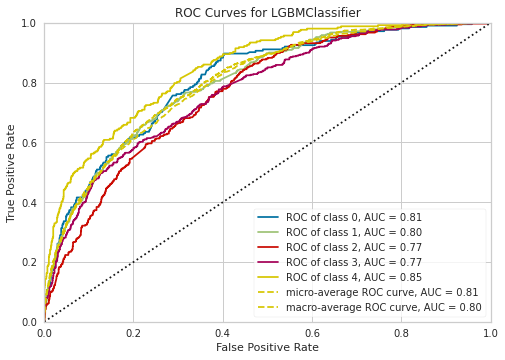

In [24]:
plot_model(final_model)

In [25]:
model2 = create_model("lr")
plot_model(model2)
tuned_model2 = tune_model(model2)
evaluate_model(tuned_model2)
predict_model(tuned_model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3541,0.6480,0.3406,0.3547,0.3529,0.1694,0.1696
1,0.3086,0.6032,0.3000,0.3104,0.3085,0.1121,0.1122
2,0.3086,0.6085,0.2874,0.3148,0.3072,0.1095,0.1099
3,0.3086,0.6056,0.2941,0.3039,0.3053,0.1155,0.1157
4,0.3517,0.6314,0.3426,0.3508,0.3507,0.1703,0.1704
5,0.3014,0.6045,0.2899,0.2997,0.2996,0.1037,0.1039
6,0.3589,0.6530,0.3480,0.3556,0.3560,0.1792,0.1795
7,0.3373,0.6347,0.3313,0.3354,0.3354,0.1499,0.1501
8,0.3373,0.6323,0.3296,0.3366,0.3368,0.1550,0.1550
9,0.3134,0.6039,0.2900,0.3078,0.3079,0.1128,0.1134


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.3426,0.6522,0.3308,0.3386,0.3401,0.1558,0.1560


,F_titl_True,F_shar_True,F_nev_False,F_bal_True,F_par_False,F_rock_True,F_compel_False,F_term_False,F_ent_True,F_park_True,...,F_metaph_False,F_und_False,F_old-fashion_False,F_origin_True,F_dant_True,F_beauty_False,F_absolv_False,label,Label,Score
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,3,0.3308
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.6917
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,3,0.6515
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,3,0.6872
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,4,0.6442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,3,0.4167
1788,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,3,0.6749
1789,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,2,0.5663
1790,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,3,0.6409


In [26]:
final_model2 = finalize_model(tuned_model2)
predict_model(final_model2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6250,0.8817,0.6133,0.6262,0.6226,0.5164,0.5178


,F_titl_True,F_shar_True,F_nev_False,F_bal_True,F_par_False,F_rock_True,F_compel_False,F_term_False,F_ent_True,F_park_True,...,F_metaph_False,F_und_False,F_old-fashion_False,F_origin_True,F_dant_True,F_beauty_False,F_absolv_False,label,Label,Score
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,2,0.4007
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.7485
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2,3,0.4359
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,3,0.7078
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,4,0.7425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.7010
1788,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,4,0.4059
1789,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1,0.6098
1790,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,4,3,0.4465
